## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train_dataset.csv')

# 필요없는 열 제거
train.drop('Unnamed: 0', axis=1, inplace=True)

## <span style="color: hotpink"> **1. 데이터 분석** </span>

In [155]:
train

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.00000,0.00000,8.00000,15.00000,15.00000,2.00000,0.00000,0.00000,0.00000,0.00000,...,7.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,malicious
1,75.00000,0.00000,58.00000,17.00000,17.00000,6.00000,0.00000,0.00000,0.00000,0.00000,...,18.00000,0.00000,0.00000,20.00000,1.00000,1.00000,0.00000,21.00000,0.00000,benign
2,20.00000,0.00000,4.00000,16.00000,16.00000,2.00000,0.00000,0.00000,0.00000,0.00000,...,33.00000,0.00000,0.00000,101.00000,1.00000,1.00000,3.00000,70.00000,0.00000,benign
3,27.00000,0.00000,13.00000,14.00000,14.00000,3.00000,0.00000,0.00000,0.00000,0.00000,...,15.00000,0.00000,0.00000,151.00000,1.00000,1.00000,1.00000,55.00000,0.00000,benign
4,39.00000,2.00000,12.00000,27.00000,27.00000,2.00000,0.00000,0.00000,0.00000,0.00000,...,10.00000,0.00000,0.00000,332.00000,1.00000,1.00000,0.00000,321.00000,0.00000,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.00000,3.00000,16.00000,52.00000,52.00000,2.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,11.00000,1.00000,1.00000,0.00000,3.00000,0.00000,malicious
3660,66.00000,0.00000,48.00000,18.00000,18.00000,2.00000,0.00000,0.00000,0.00000,0.00000,...,14.00000,0.00000,0.00000,212.00000,1.00000,1.00000,3.00000,475.00000,0.00000,benign
3661,90.00000,1.00000,64.00000,26.00000,26.00000,4.00000,0.00000,0.00000,0.00000,0.00000,...,13.00000,0.00000,0.00000,75.00000,1.00000,1.00000,2.00000,103.00000,0.00000,malicious
3662,46.00000,0.00000,33.00000,13.00000,13.00000,3.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,4.00000,1.00000,1.00000,0.00000,3.00000,0.00000,benign


### <span style="color: skyblue"> **데이터 형식** </span>

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

### <span style="color: skyblue"> **기초통계정보** </span>

In [157]:
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
url_len,3664.000000,54.559225,82.493265,6.000000,24.000000,36.000000,55.000000,1837.000000
url_num_hyphens_dom,3664.000000,0.412937,0.847058,0.000000,0.000000,0.000000,1.000000,14.000000
url_path_len,3663.000000,29.365820,78.595248,0.000000,1.000000,13.000000,31.000000,1816.000000
url_domain_len,3663.000000,20.383292,9.597012,4.000000,14.000000,17.000000,24.000000,109.000000
url_hostname_len,3664.000000,20.330513,9.628093,4.000000,14.000000,17.000000,24.000000,109.000000
url_num_dots,3664.000000,2.516921,1.534119,1.000000,2.000000,2.000000,3.000000,32.000000
url_num_underscores,3664.000000,0.272653,1.124592,0.000000,0.000000,0.000000,0.000000,18.000000
url_query_len,3664.000000,4.707697,25.318285,0.000000,0.000000,0.000000,0.000000,429.000000
url_num_query_para,3664.000000,0.104258,0.574310,0.000000,0.000000,0.000000,0.000000,9.000000
url_ip_present,3664.000000,0.060862,0.239110,0.000000,0.000000,0.000000,0.000000,1.000000


### <span style="color: skyblue"> **결측치** </span>

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64


<AxesSubplot: >

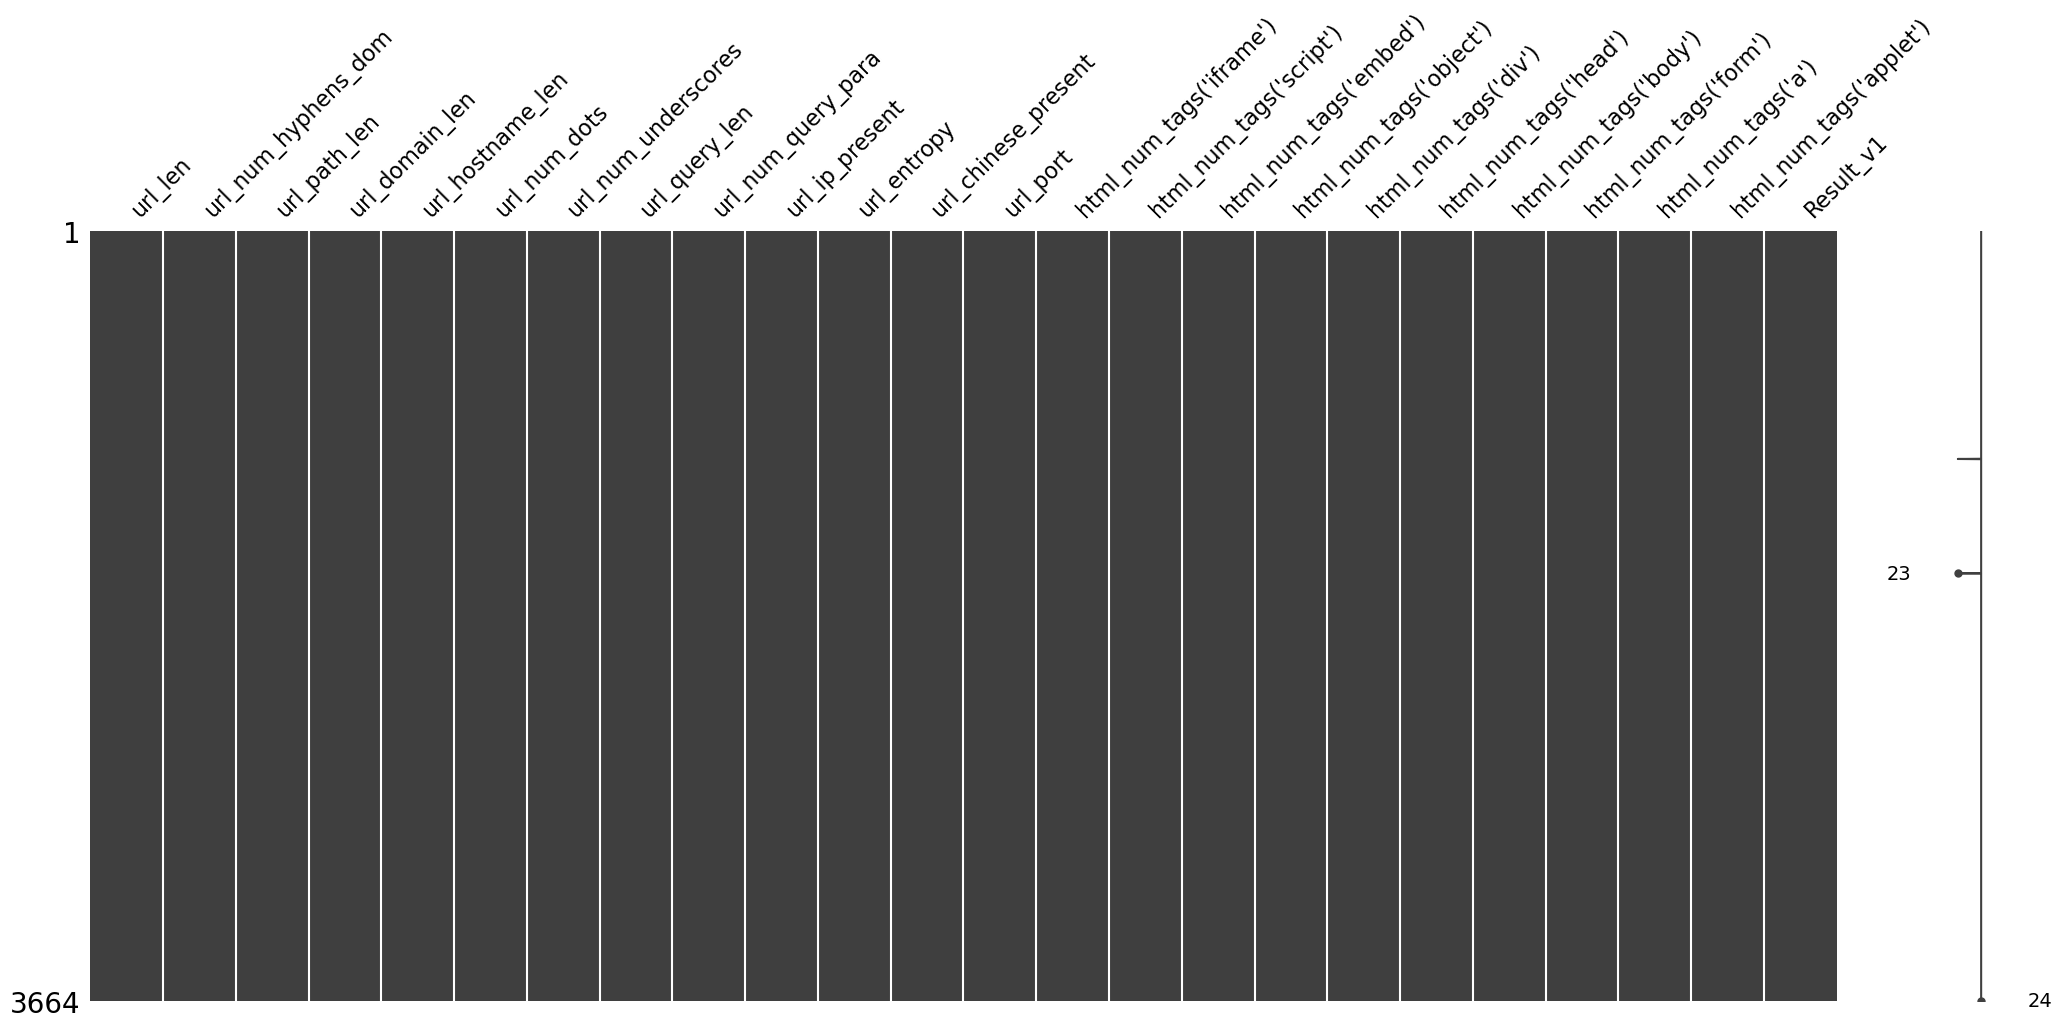

In [158]:
print(train.isna().sum())
msno.matrix(train)

## <span style="color: hotpink"> **2. 단변량 분석** </span>

### <span style="color: skyblue"> **히스토그램** </span>

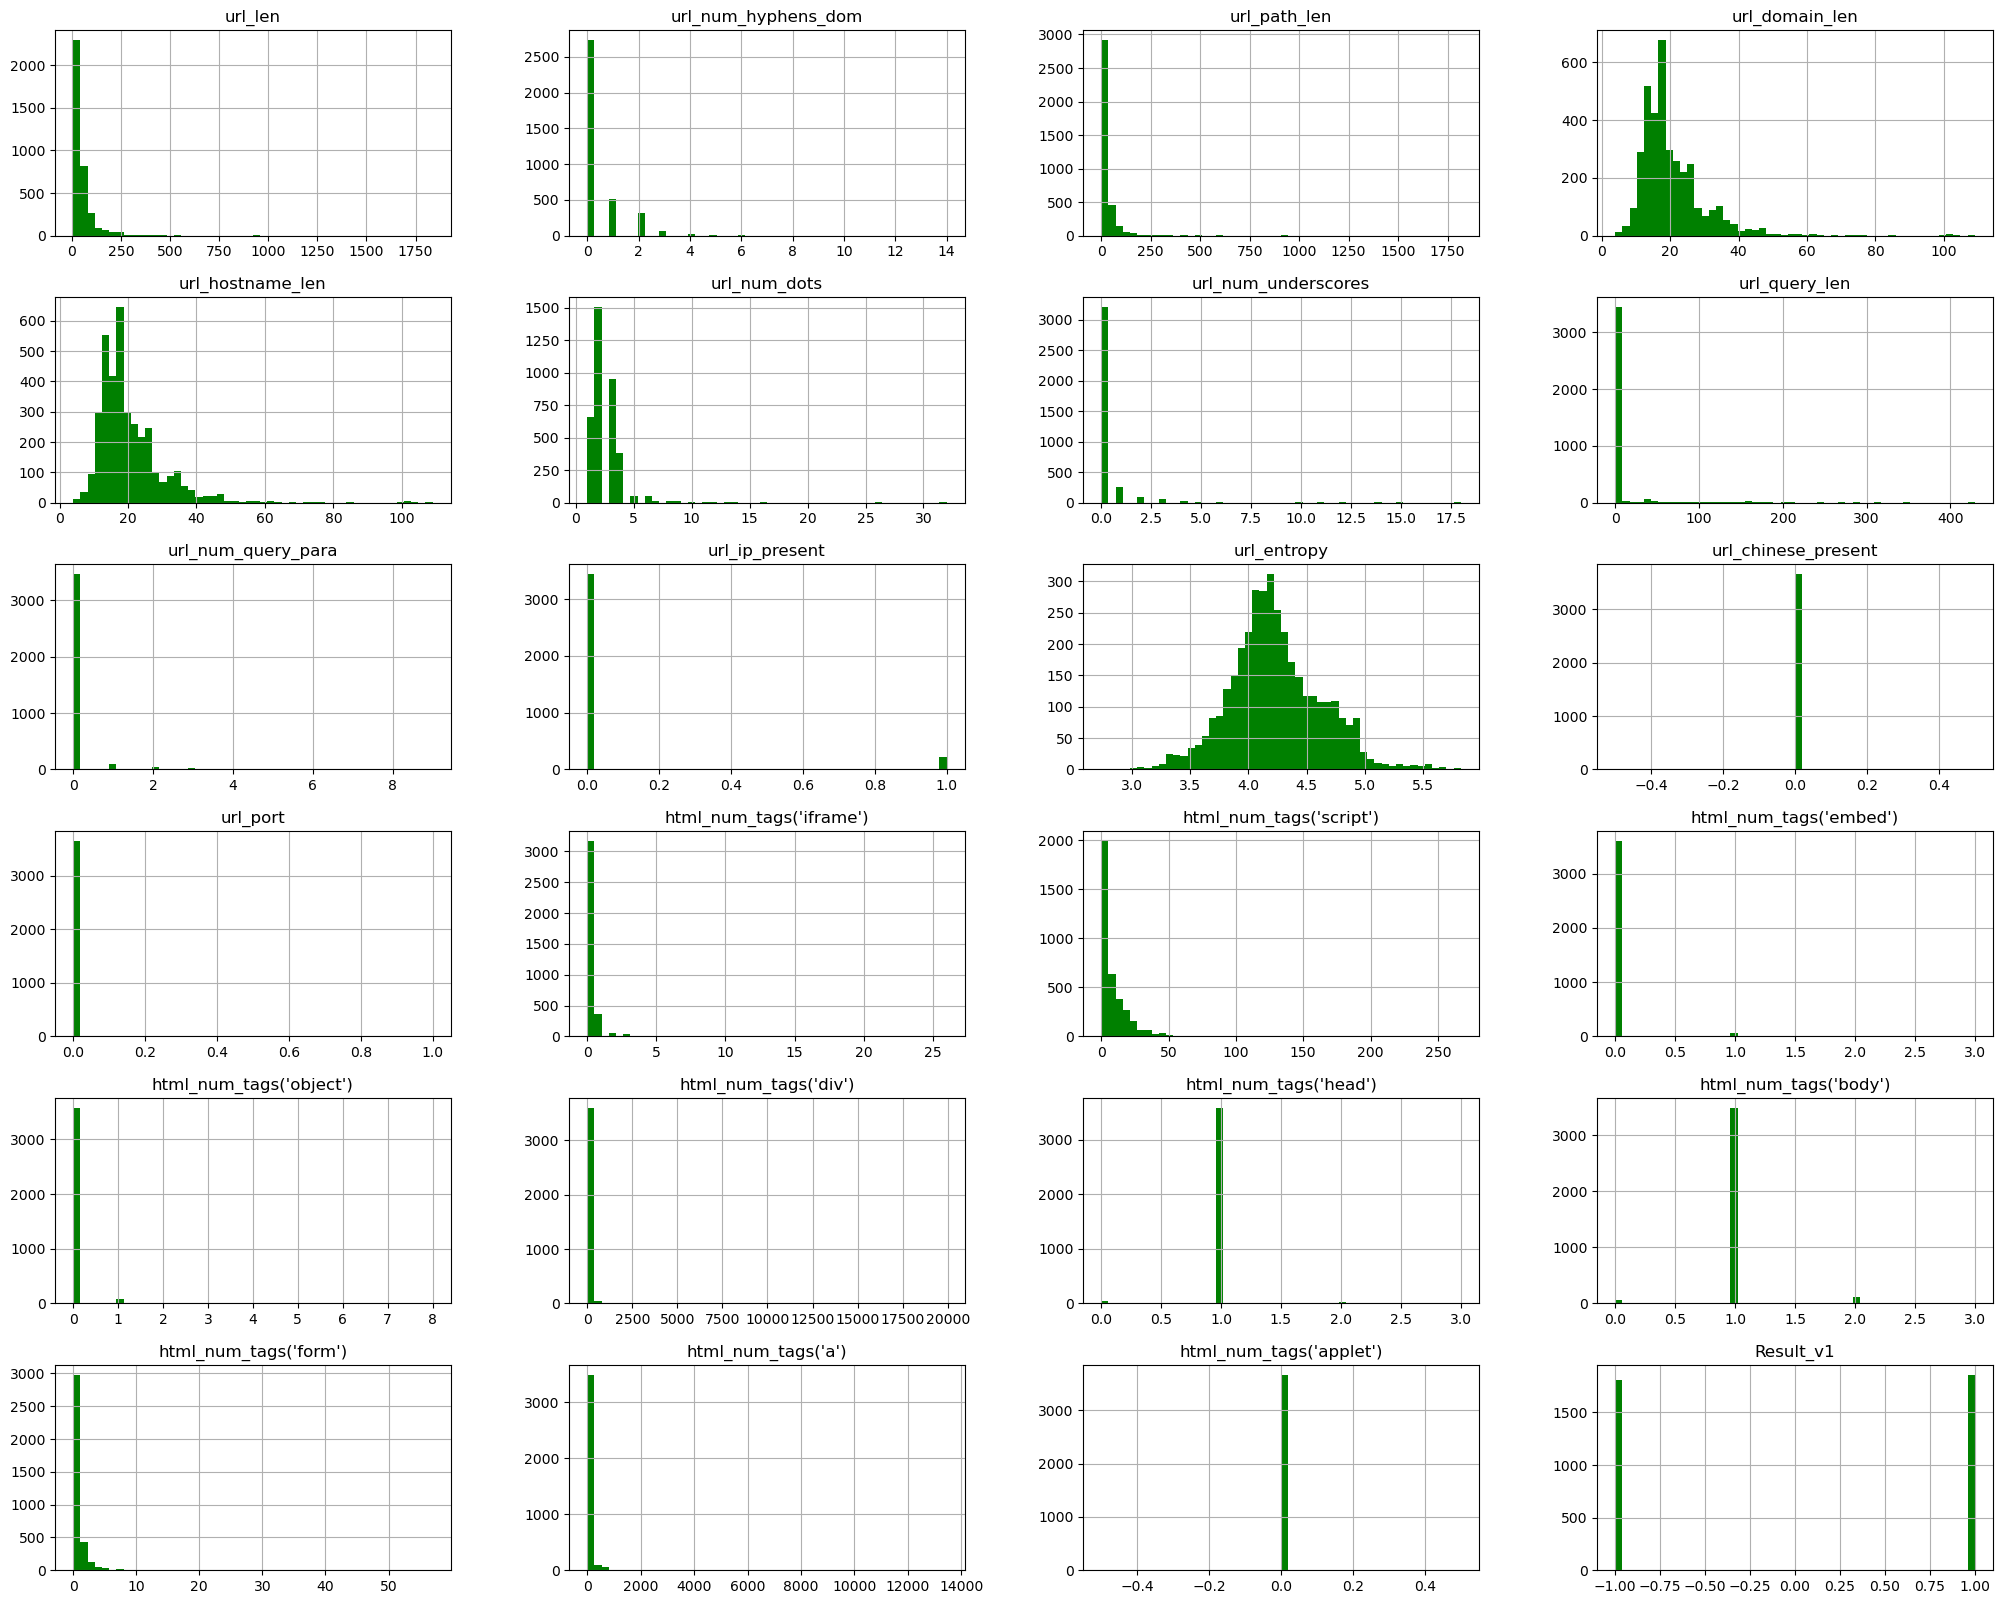

In [159]:
train_list = list(train.columns)
train_p = train.copy()
train_p['Result_v1'] = train_p['Result_v1'].map({'benign':1, 'malicious':-1})

fig, ax = plt.subplots(6, 4, figsize=(25, 20))
train_p.hist(bins=50, color='green', ax=ax)

plt.show()

### <span style="color: skyblue"> **데이터 고유값(unique)** </span>

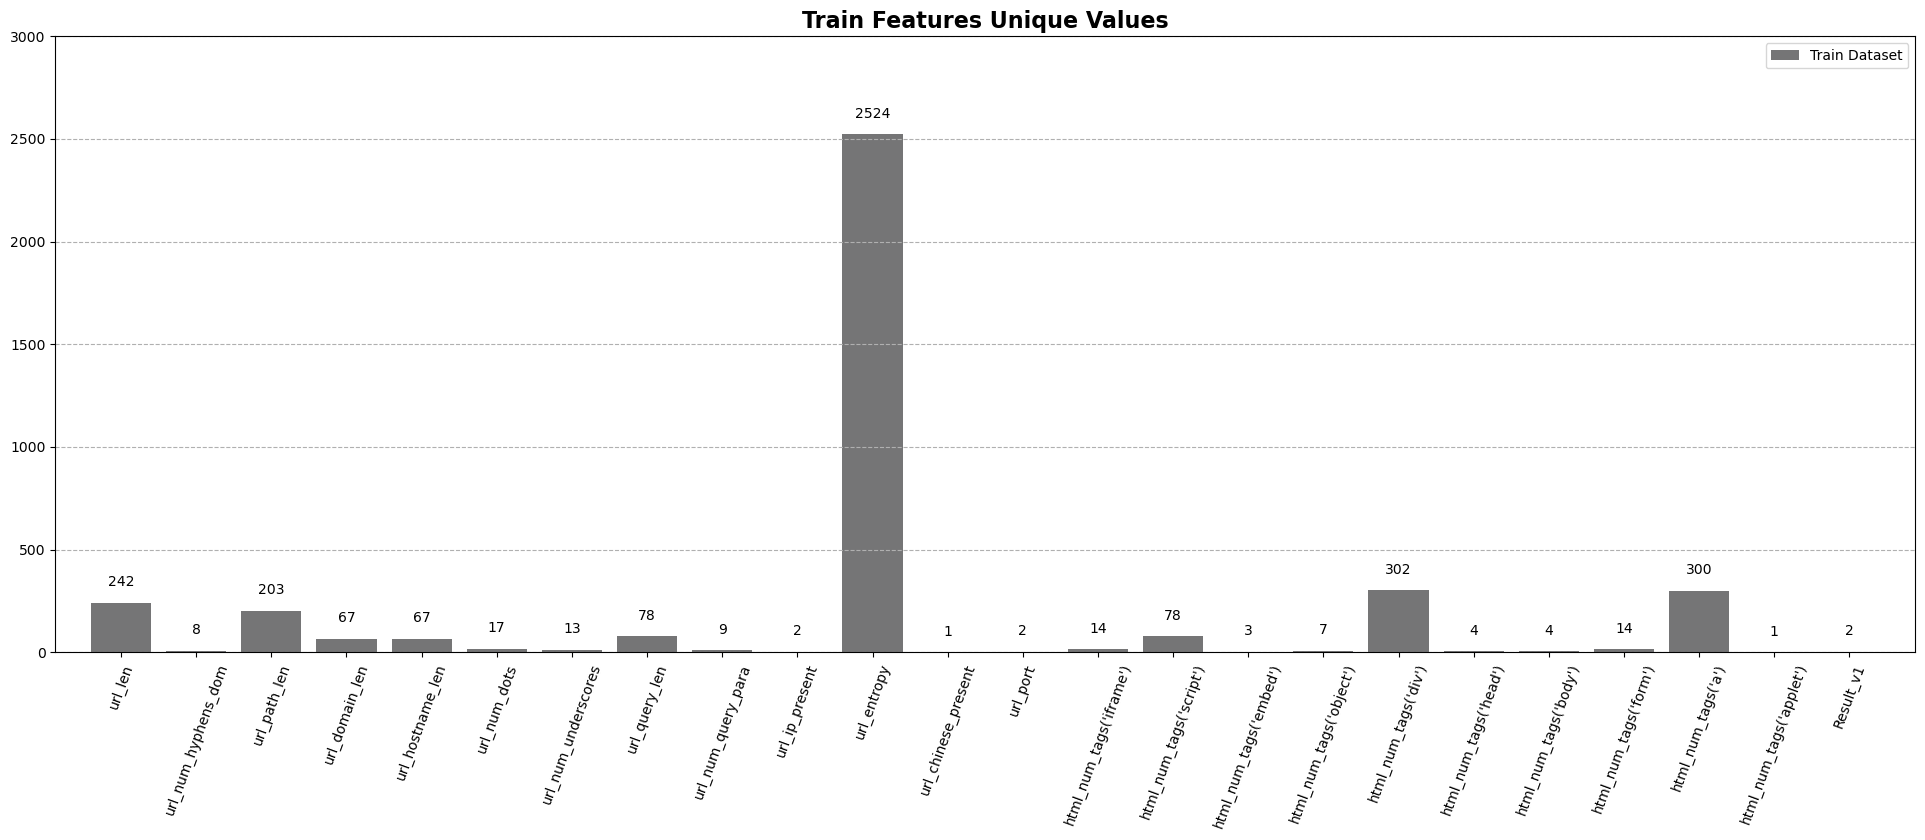

In [160]:
train_list = list(train.columns)

fig, ax = plt.subplots(1, 1, figsize=(24, 8))

ay = np.array([train[f'{train.columns[i]}'].nunique() for i in range(24)])

ax.bar(train_list, ay, alpha=0.7, color=[0.22745098, 0.22745098, 0.23529412], label='Train Dataset')

for i in range(24):
    ax.annotate(f'{train[train.columns[i]].nunique()}', xy=(i, train[train.columns[i]].nunique()+100), va='center', ha='center')

ax.set_xticklabels(train_list, rotation=70)
ax.set_ylim(0,3000)
ax.margins(0.02)
ax.grid(axis='y', linestyle='--', zorder=5)
ax.set_title('Train Features Unique Values', fontsize=16, loc='center', fontweight='bold')
ax.legend()
plt.show()

- 고유값이 1개이므로 삭제해도 무방

In [161]:
print(train["url_chinese_present"].value_counts())
print(train["html_num_tags('applet')"].value_counts())

0.00000    3664
Name: url_chinese_present, dtype: int64
0.00000    3664
Name: html_num_tags('applet'), dtype: int64


## <span style="color: hotpink"> **3 이변량 분석** </span>

### <span style="color: skyblue"> **상관관계** </span>

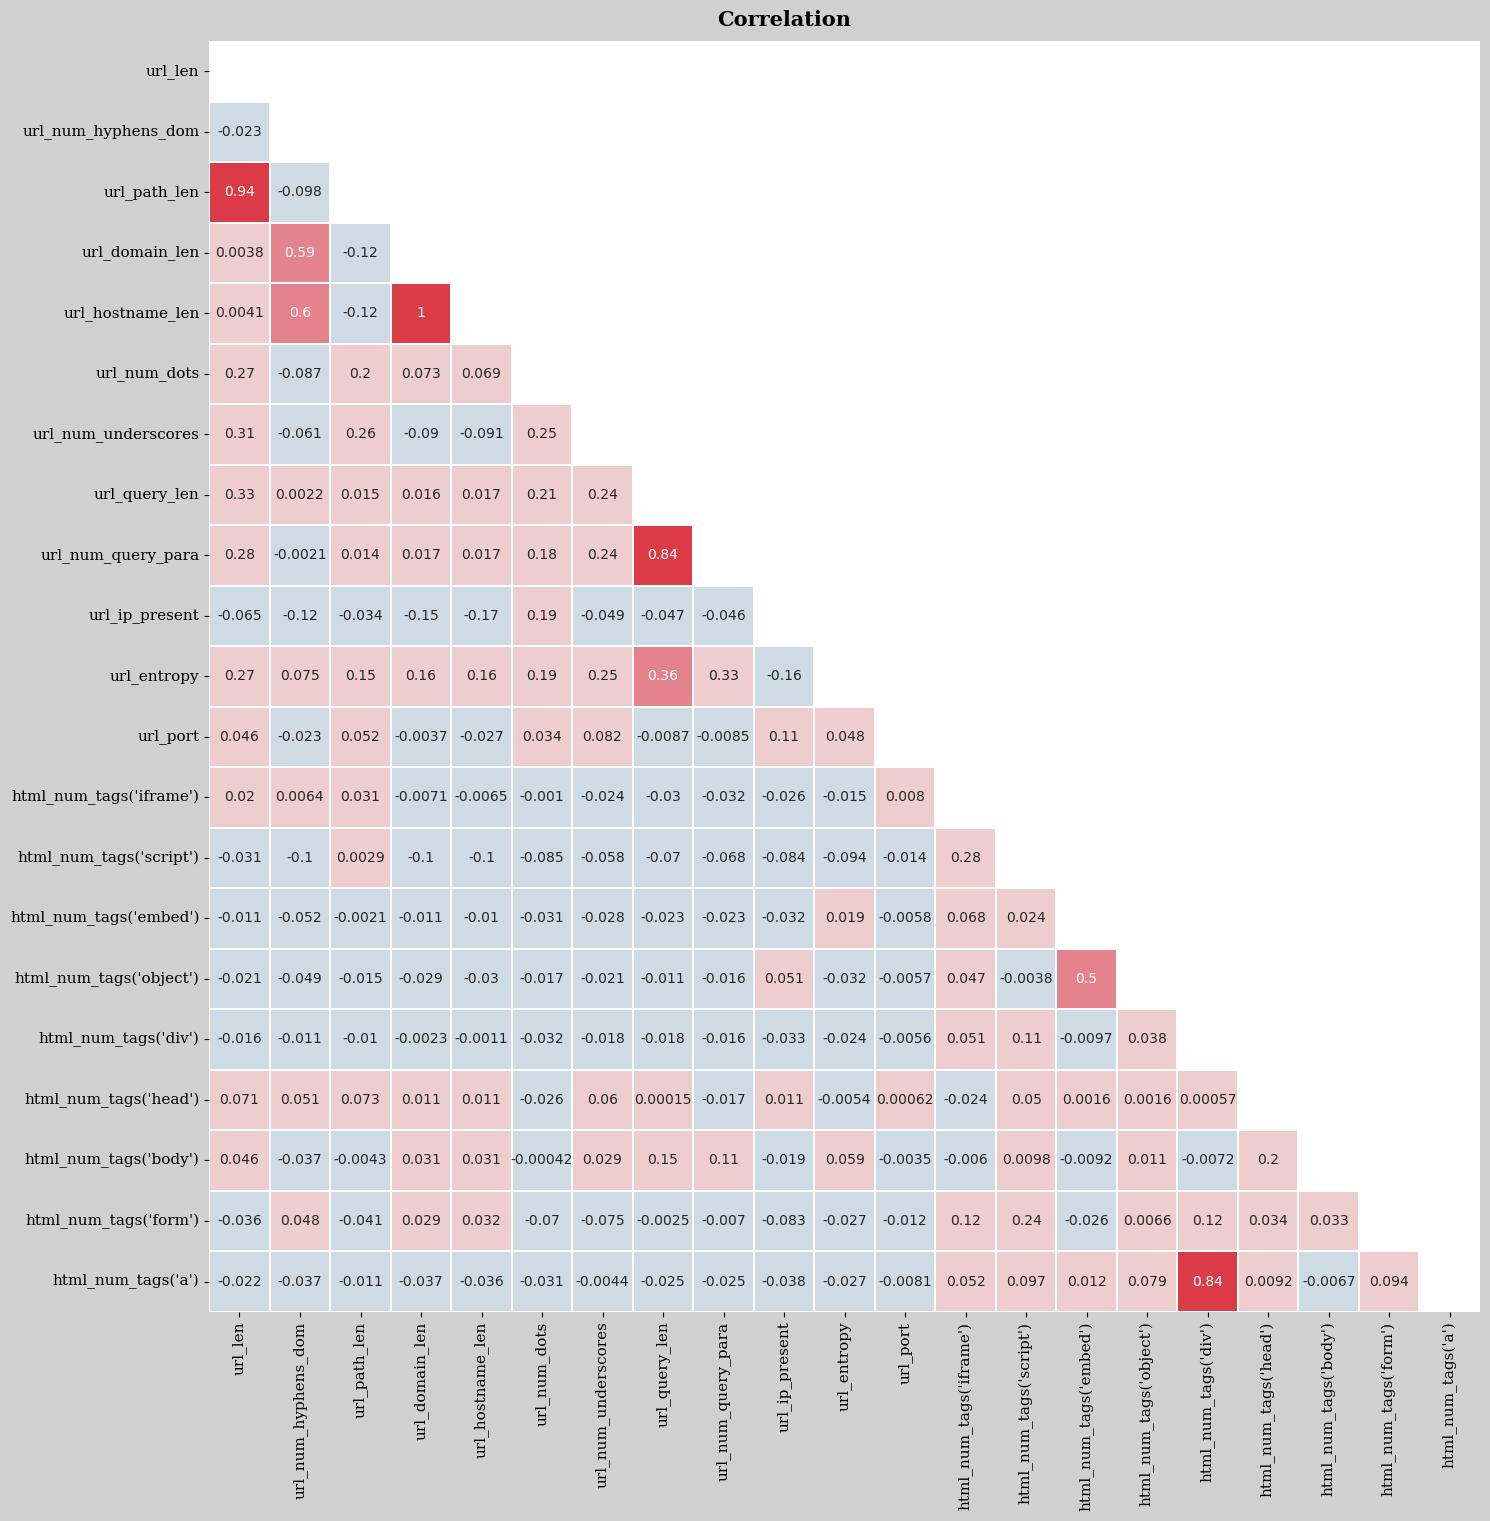

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
fig.set_facecolor('#d0d0d0') 
corr = train.drop(["url_chinese_present", "html_num_tags('applet')", "Result_v1"], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, 
            square=True, 
            linewidth=0.2,
            cbar=False,
            mask=mask,
            annot=True,
            center=0,
            cmap=sns.diverging_palette(240, 10),
            ax=ax)

fig.text(0.48, 1, 'Correlation', fontweight='bold', fontfamily='serif', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.tight_layout()
plt.show()

### <span style="color: skyblue"> **정상 데이터의 상관관계** </span>

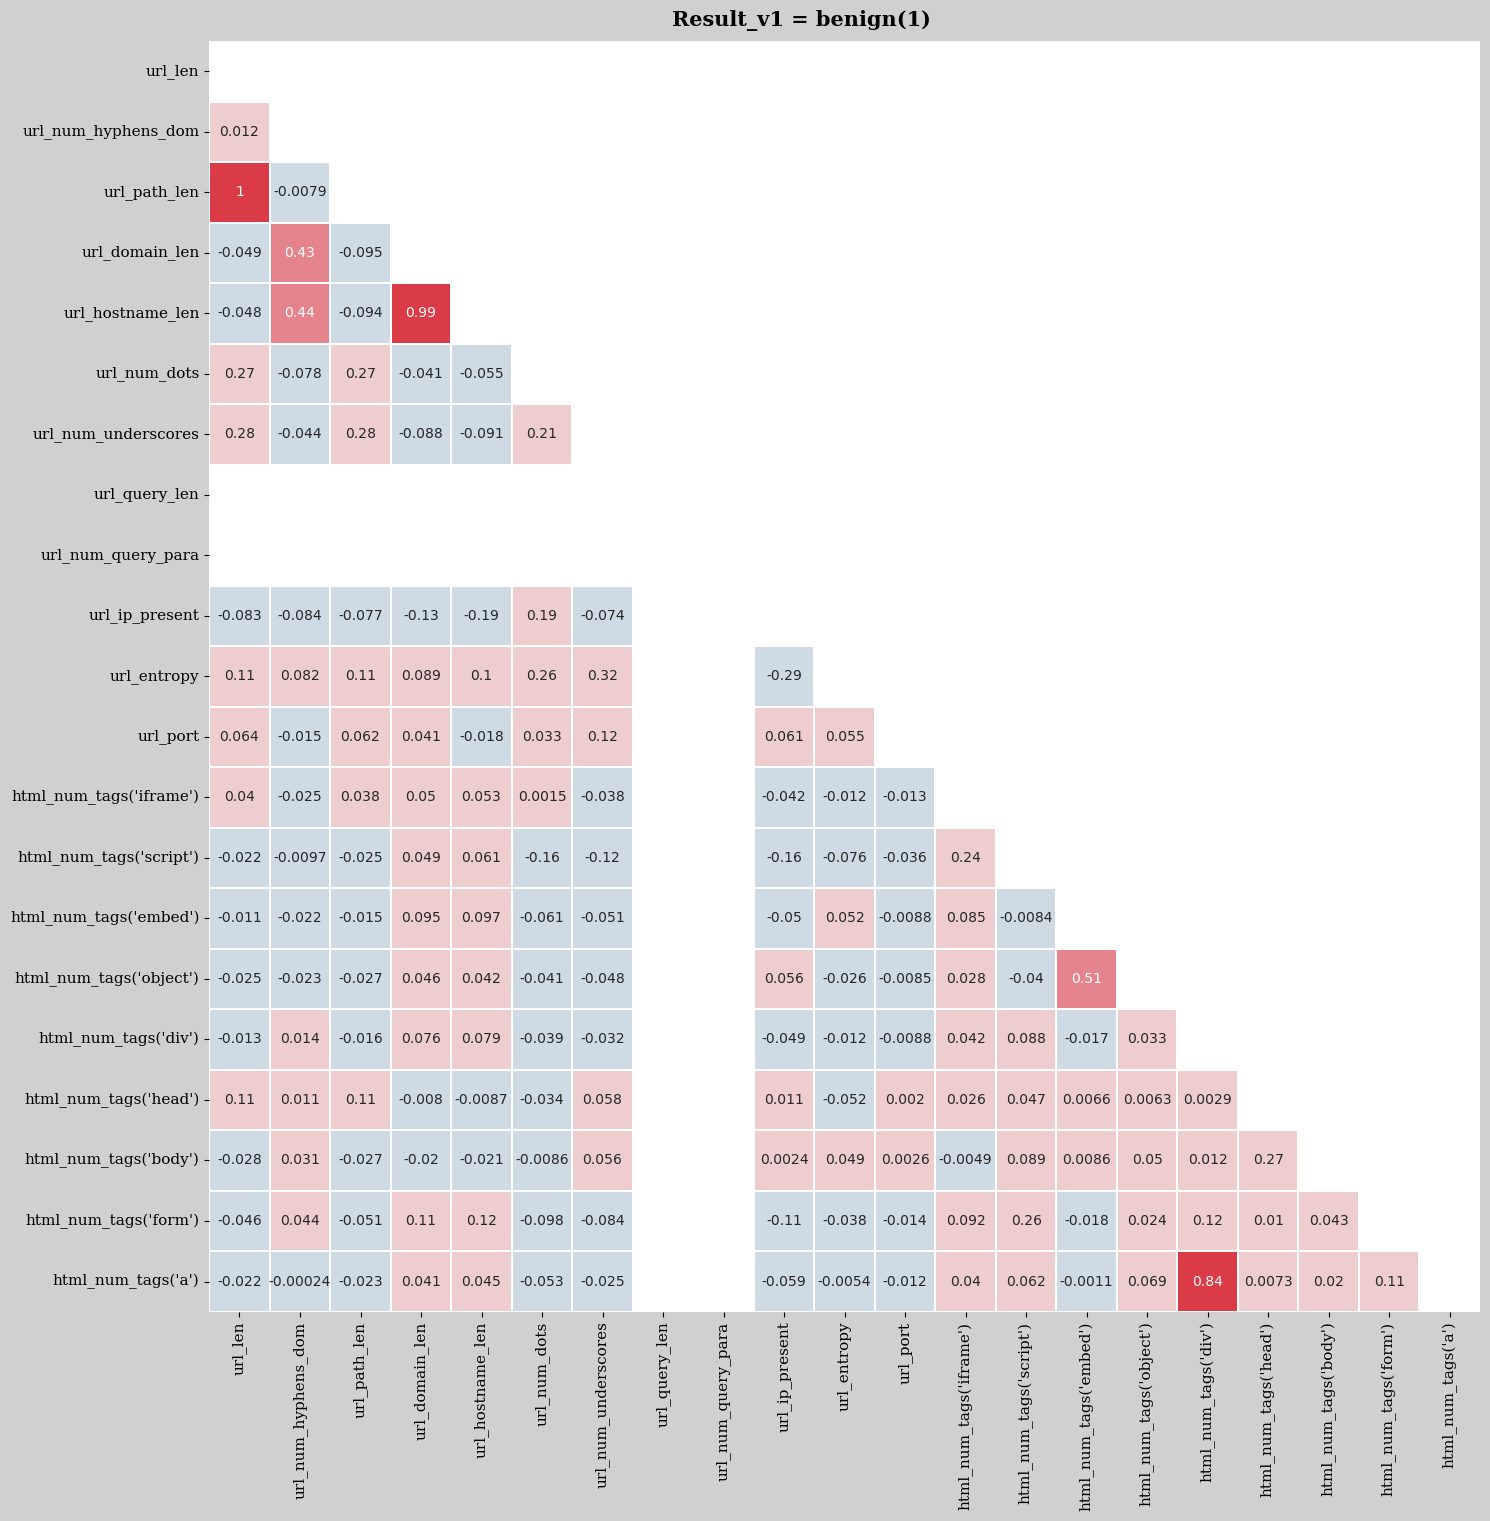

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
fig.set_facecolor('#d0d0d0')
corr2 = train[train['Result_v1'] == 'benign']
corr2 = corr2.drop(["url_chinese_present", "html_num_tags('applet')", "Result_v1"], axis=1).corr()
mask = np.triu(np.ones_like(corr2, dtype=bool))

sns.heatmap(corr2, 
            square=True, 
            linewidth=0.2,
            cbar=False,
            mask=mask,
            annot=True,
            center=0,
            cmap=sns.diverging_palette(240, 10),
            ax=ax)

fig.text(0.45, 1, 'Result_v1 = benign(1)', fontweight='bold', fontfamily='serif', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.tight_layout()
plt.show()

### <span style="color: skyblue"> **악성 데이터의 상관관계** </span>

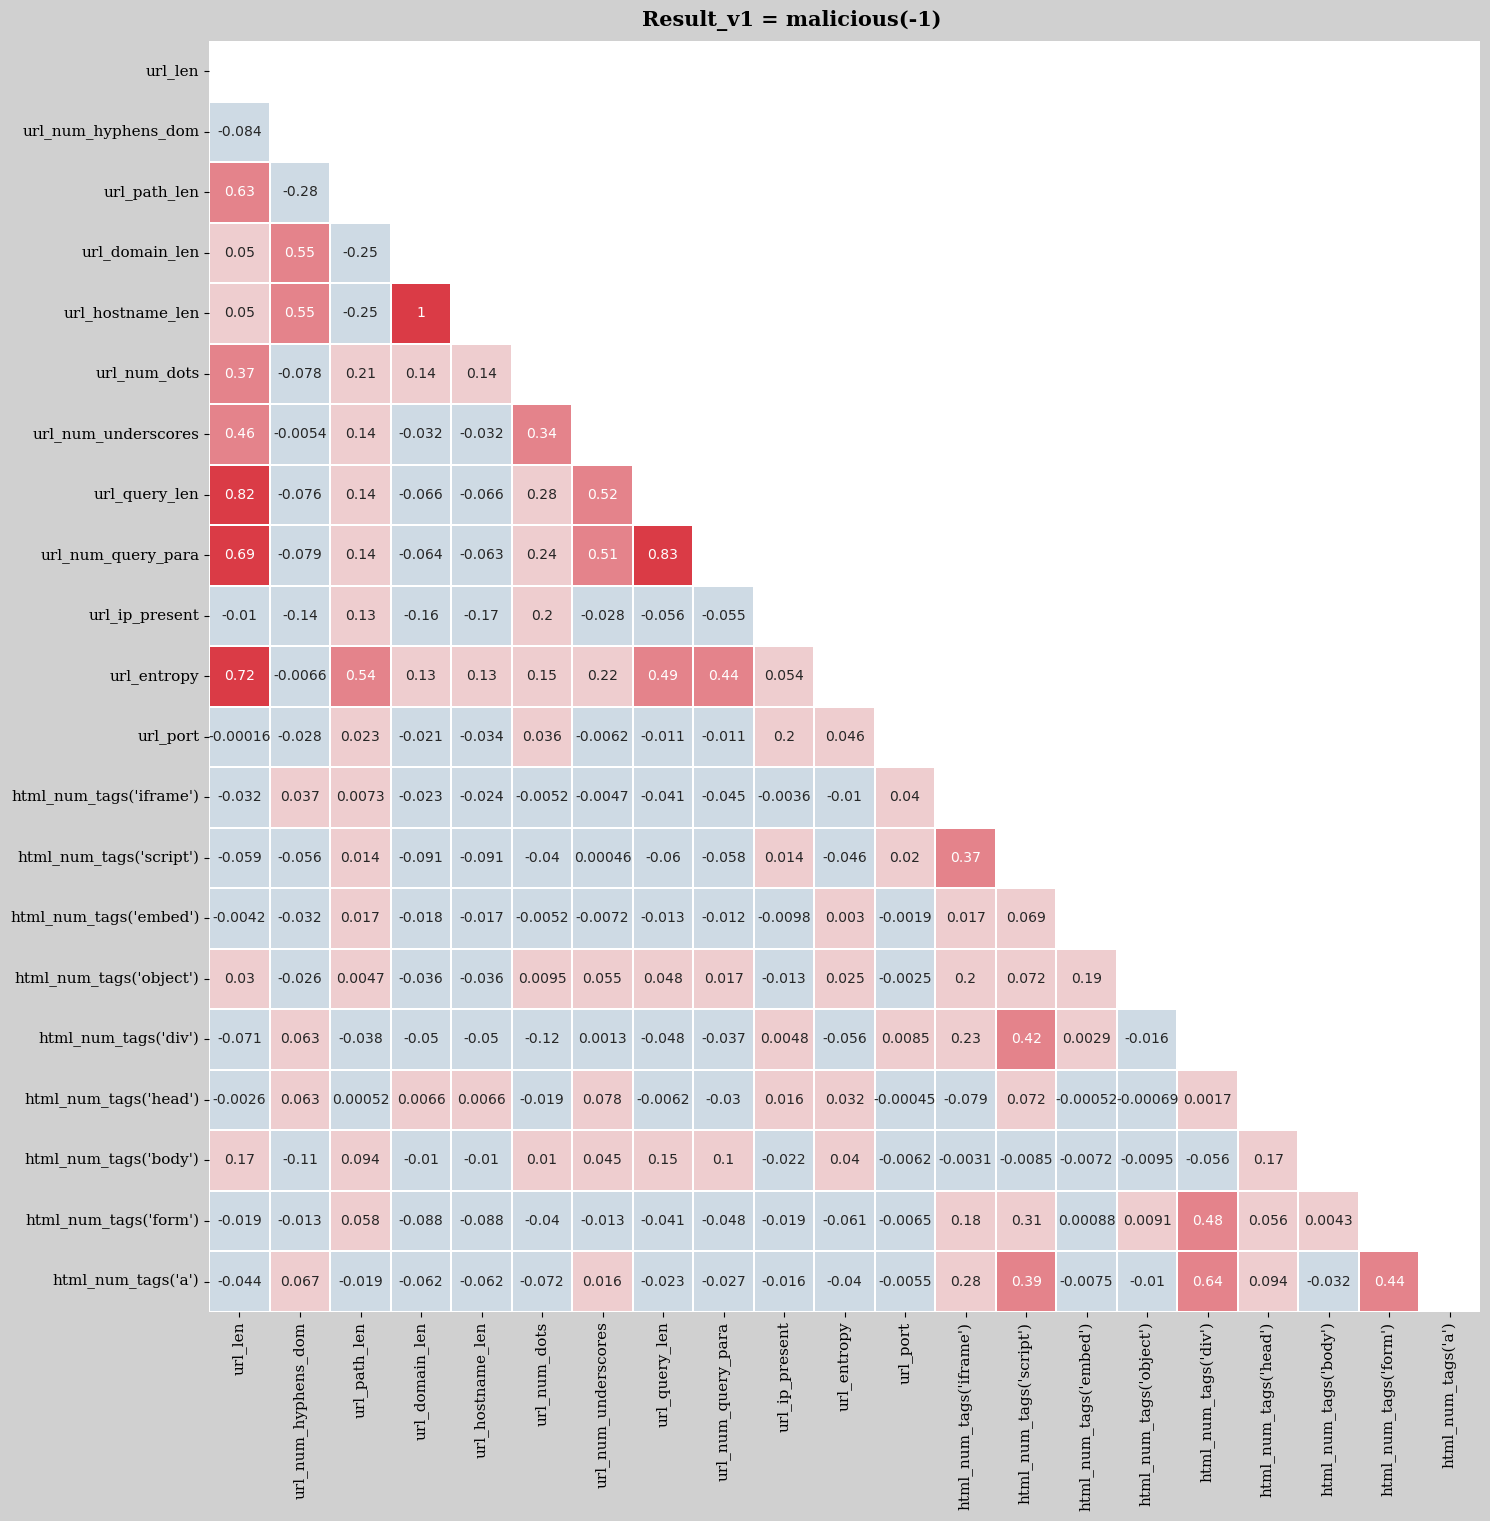

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
fig.set_facecolor('#d0d0d0')
corr3 = train[train['Result_v1'] == 'malicious']
corr3 = corr3.drop(["url_chinese_present", "html_num_tags('applet')", "Result_v1"], axis=1).corr()
mask = np.triu(np.ones_like(corr3, dtype=bool))

sns.heatmap(corr3, 
            square=True, 
            linewidth=0.2,
            cbar=False,
            mask=mask,
            annot=True,
            center=0,
            cmap=sns.diverging_palette(240, 10),
            ax=ax)

fig.text(0.43, 1, 'Result_v1 = malicious(-1)', fontweight='bold', fontfamily='serif', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.tight_layout()
plt.show()

### <span style="color: skyblue"> **정상 사이트와 악성 사이트의 히스토그램** </span>

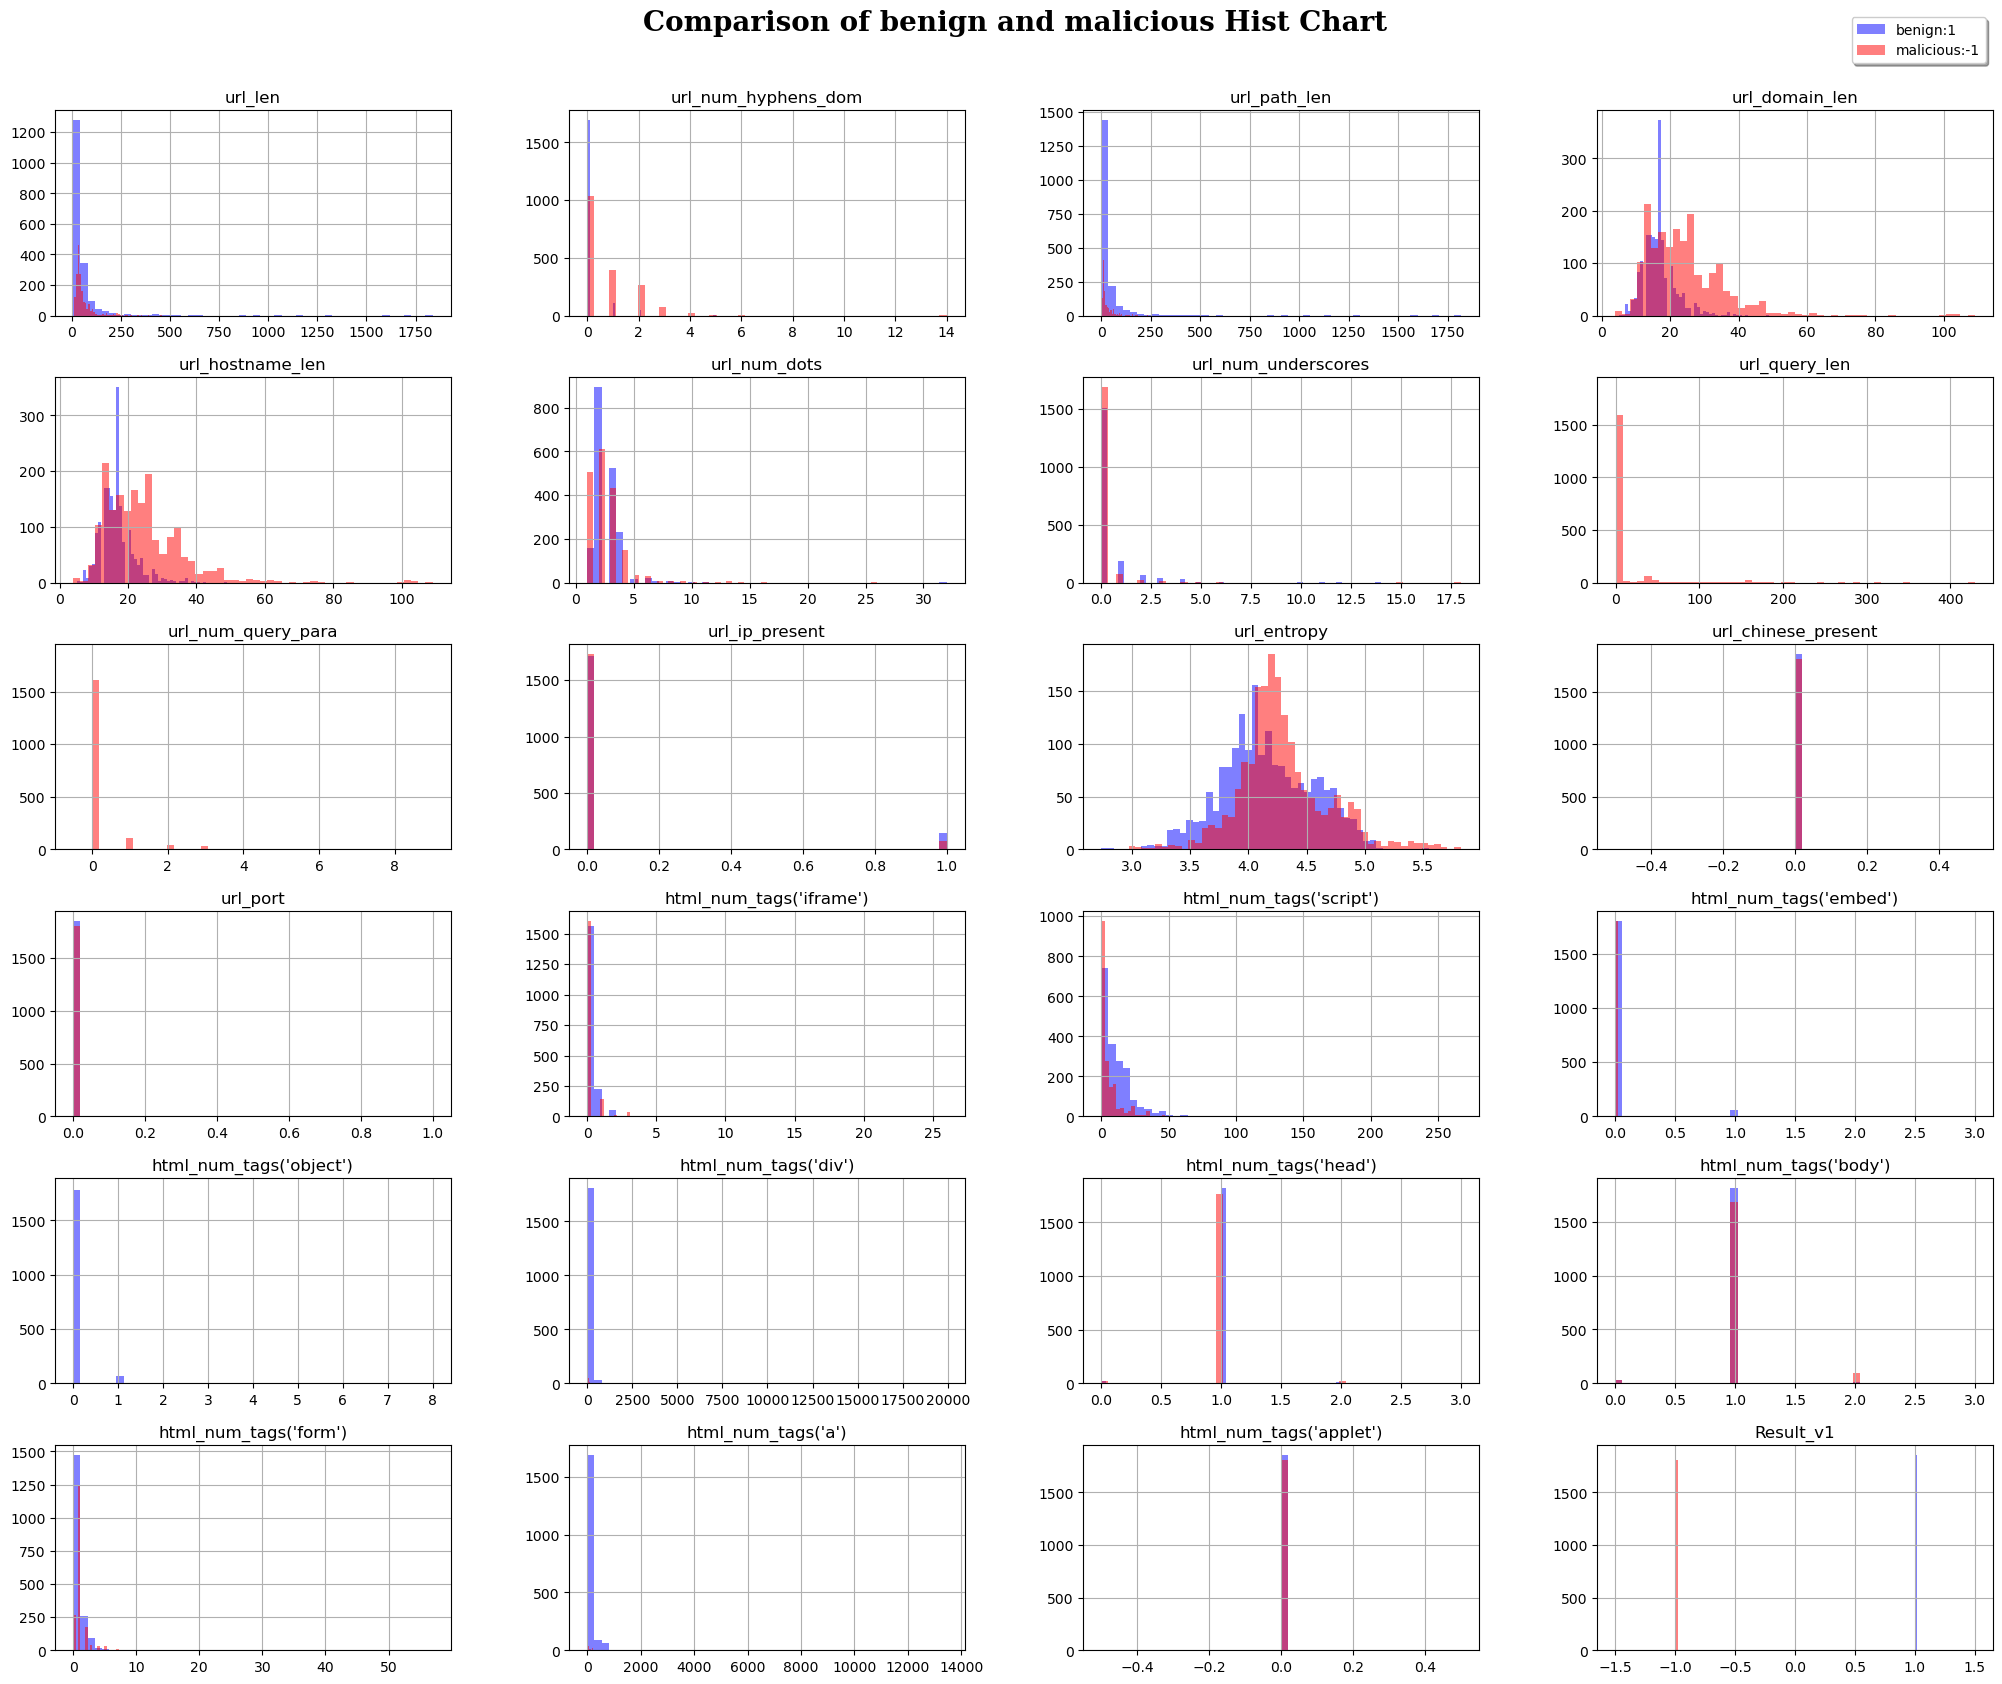

In [165]:
train_list = list(train.columns)
train['Result_v1'] = train['Result_v1'].map({'benign':1, 'malicious':-1})

fig, ax = plt.subplots(6, 4, figsize=(25, 20))

h = train.loc[train['Result_v1'] == 1, train_list[:24]].hist(alpha=0.5, bins=50, color='b', ax=ax)
h = train.loc[train['Result_v1'] == -1, train_list[:24]].hist(alpha=0.5, bins=50, color='r', ax=ax)

fig.text(0.36, 0.92, 'Comparison of benign and malicious Hist Chart', fontsize=20, fontweight='bold', fontfamily='serif')
fig.legend(['benign:1', 'malicious:-1'], shadow=True, bbox_to_anchor=(0.9, 0.93))

plt.show()

### <span style="color: skyblue"> **로지스틱 회귀 모델로부터 p-value 계산** </span>

In [166]:
pd.set_option('display.float_format', '{:.5f}'.format)

train = train.drop(["url_chinese_present", "html_num_tags('applet')"], axis=1)
train['Result_v1'] = train['Result_v1'].map({1:1, -1:0})
train = train.dropna()
train_list = list(train.columns)
train_list = train_list[:21]

In [167]:
X = train[train_list]
y = train.Result_v1

model = sm.Logit(y, sm.add_constant(X))
result = model.fit()

coefs = pd.DataFrame({
    'coef': result.params.values,
    'pvalue': result.pvalues
}).sort_values('pvalue', ascending=False)

         Current function value: 0.389693
         Iterations: 35


In [168]:
def draw_color(x, color, fontcolor):
    if  0.9 < x < 1:
        color = f'background-color:{color};color:{fontcolor}'
        return color
    else:
        return ''
    
coefs.style.applymap(draw_color, color='#ff9090', fontcolor='black')

,coef,pvalue
url_num_query_para,2.467460,0.999869
url_query_len,17.585441,0.999340
url_len,-18.102491,0.999269
url_path_len,18.102668,0.999269
url_domain_len,19.245228,0.999222
html_num_tags('head'),-0.012803,0.970118
html_num_tags('embed'),0.268610,0.672649
html_num_tags('div'),-0.000456,0.594802
url_entropy,-0.259126,0.075356
url_ip_present,-0.463552,0.017610
